<a href="https://colab.research.google.com/github/mcbaccam/Anal-tica-de-Negocio/blob/main/Parcial_1_BACCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parcial 1. Maria Camila Bacca

0. Se carga la librería

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

import numpy as np #Funciones matemaricas
import pandas as pd #Comunicacion con excel
from sklearn.naive_bayes import GaussianNB #Funcion Gaussiana
from sklearn.metrics import confusion_matrix #La metrica de medida


#Prestamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos

In [ ]:
nxl='/content/drive/MyDrive/4. BD_Parcial_L_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(10)

#Seleccionamos las variables de interes
XDB=XDB[['White','HS GPA','SAT', 'GPA', 'College Parent', 'Grad']]

#Datos de entrada - np.array()- convertir a numeros
XD=np.array(XDB[['White','HS GPA','SAT', 'GPA', 'College Parent']])

#Datos de salida - valor deseado - que quiero quue aprenda el modelo
yd=np.array(XDB['Grad'])
print(XDB)

total_datos = len(XDB)
print("En la base de datos hay", total_datos, "datos.")
print()

#Porcentaje Urbano
len(XD)
len(np.where(yd==1)[0])

len(np.where(yd==1)[0])/len(XD)
print("El porcentaje de las personas que SI van a lograr su grado en 4 años es de:", len(np.where(yd==1)[0])/len(XD))


#Porcentaje Rural
len(XD)
len(np.where(yd==0)[0])

len(np.where(yd==0)[0])/len(XD)
print("El porcentaje de las personas que NO van a lograr su grado en 4 años es de:", len(np.where(yd==0)[0])/len(XD))

      White  HS GPA   SAT    GPA  College Parent  Grad
0         1    4.14  1410  2.949               1     1
1         1    3.30  1260  2.789               1     1
2         0    4.30   950  2.851               0     1
3         1    4.29  1290  3.533               1     1
4         1    4.20  1350  3.301               1     1
...     ...     ...   ...    ...             ...   ...
1995      1    3.18  1400  3.118               1     1
1996      0    3.82  1230  2.640               1     0
1997      0    3.74  1140  2.283               0     0
1998      1    3.75  1260  3.193               1     1
1999      0    3.08   950  2.090               0     0

[2000 rows x 6 columns]
En la base de datos hay 2000 datos.

El porcentaje de las personas que SI van a lograr su grado en 4 años es de: 0.692
El porcentaje de las personas que NO van a lograr su grado en 4 años es de: 0.308


2. Correlación

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlacion:
                    White    HS GPA       SAT       GPA  College Parent  \
White           1.000000  0.130981  0.191930  0.194132       -0.005987   
HS GPA          0.130981  1.000000  0.346767  0.376932        0.020068   
SAT             0.191930  0.346767  1.000000  0.260927       -0.029768   
GPA             0.194132  0.376932  0.260927  1.000000       -0.015137   
College Parent -0.005987  0.020068 -0.029768 -0.015137        1.000000   
Grad            0.133612  0.283404  0.172794  0.726624       -0.018035   

                    Grad  
White           0.133612  
HS GPA          0.283404  
SAT             0.172794  
GPA             0.726624  
College Parent -0.018035  
Grad            1.000000  


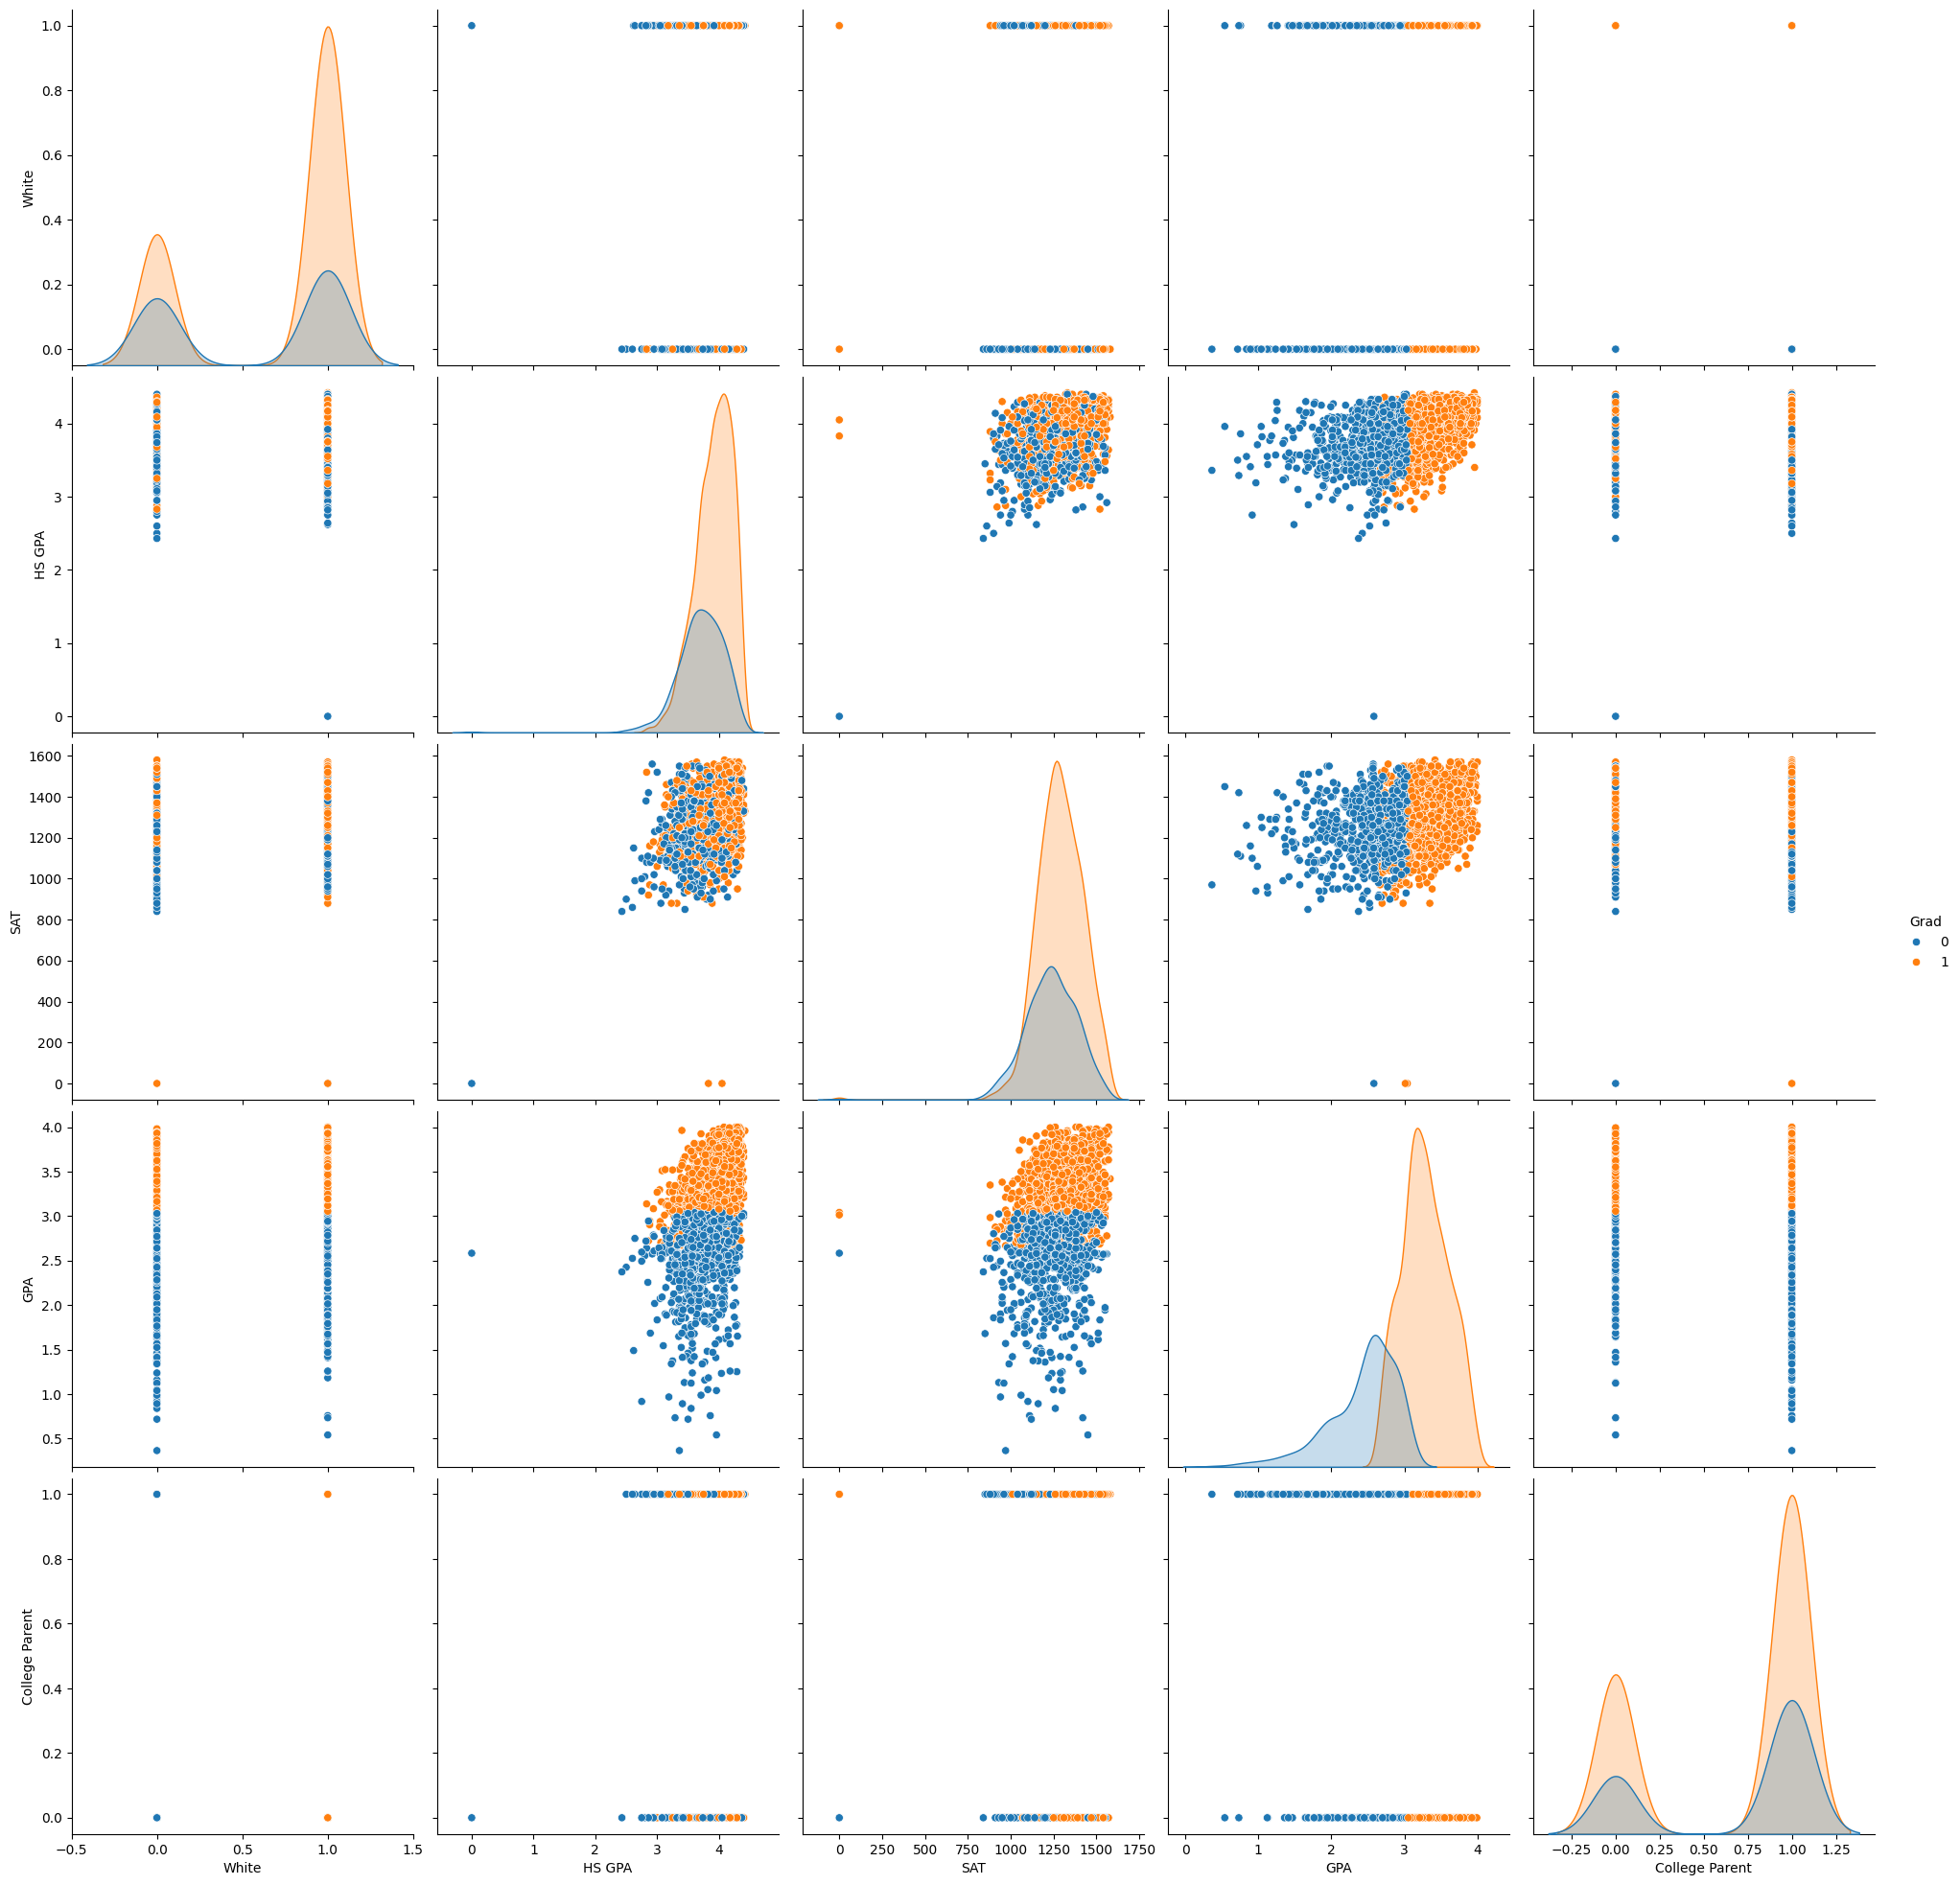

In [ ]:
XDB=XDB.dropna()
XDB.head(100) #Mostrar las primerar 100 filas

XDB=XDB[['White','HS GPA','SAT', 'GPA', 'College Parent', 'Grad']]
sns.pairplot(XDB, hue='Grad',size=4,vars=['White','HS GPA','SAT', 'GPA', 'College Parent'])

#Para confirmar la buena correlacion
corr = XDB.corr()
print("Esta es la matriz de correlacion:\n",corr)

#Se procede con la configuracion de los datos de entrada y salida
XD=np.array(XDB.iloc[:,0:5])  #Variables de entrada
yd=np.array(XDB.iloc[:,5])    #Grad

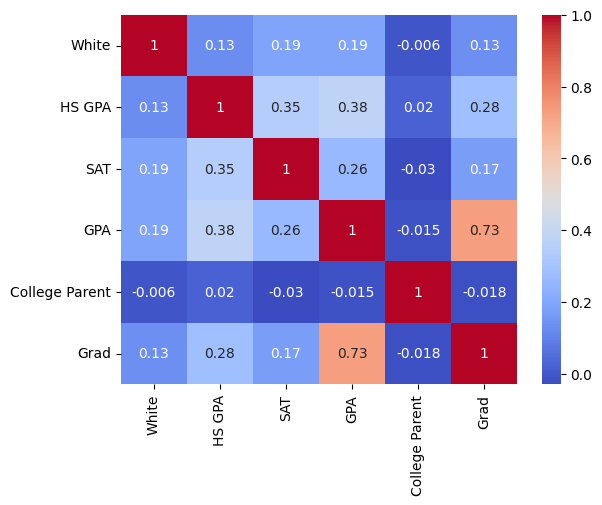

In [ ]:
#Gráfico de la matriz de correlación entre las variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

3. De acuerdo al modelo Naive Bayes

In [ ]:
mnb=GaussianNB() #Llamamos el modelo
mnb.fit(XD,yd)
ydp=mnb.predict(XD) #Muestra los datos de salida que el obtuvo

#Metrica de evaluacion - como se comporto el modelo identificando la preapr/preneg
cm=confusion_matrix(yd,ydp)
print("La matriz de confusion es: ")
print(cm)

VN=cm[0,0] #Verdaderos Negativos
FP=cm[0,1] #Falsos Positivos
FN=cm[1,0] #Falsos Negativos
VP=cm[1,1] #Verdaderos Positivos

Exactitud=(VP+VN)/len(XD)
print("La exactitud del modelo es: ") #Comportamiento General
print(Exactitud)

Sensibilidad=VP/(VP+FN)
print("La sensibilidad del modelo es: ") #Como se comporto frente a los positivos
print(Sensibilidad)

Especificidad=VN/(VN+FP)
print("La especificidad del modelo es: ") #Como se comporoto frente a los negativos
print(Especificidad)

#Tasa de Error
TE=(FP+FN)/(VP+VN+FP+FN)
print("La Tasa de Error es: ", TE) #Porcentaje Equivocaciones que tuvo el modelo
print()

La matriz de confusion es: 
[[ 452  164]
 [ 102 1282]]
La exactitud del modelo es: 
0.867
La sensibilidad del modelo es: 
0.9263005780346821
La especificidad del modelo es: 
0.7337662337662337
La Tasa de Error es:  0.133



In [ ]:
Xun=np.array([[1,4,1260,1.9,1]]) #Esta la persona del excel
ydun=mnb.predict(Xun)
print("Individuo de pronostico 1:",ydun)

Xun=np.array([[1,2.91,1090,2.719,1]]) #Esta la persona del excel
ydun=mnb.predict(Xun)
print("Individuo de pronostico 2:",ydun)

Xun=np.array([[0,3.58,1210,3.319,1]]) #Esta la persona del excel
ydun=mnb.predict(Xun)
print("Individuo de pronostico 3:",ydun)

Individuo de pronostico 1: [0]
Individuo de pronostico 2: [0]
Individuo de pronostico 3: [1]


Modelo Decision Tree

In [ ]:
# Encode target variable
mar=DecisionTreeClassifier(criterion='gini', max_depth = 4) #4 Niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

#Evaluamos el modelo
VN=cm[0][0]; FP=cm[0][1]; FN=cm[1][0]; VP=cm[1][1]

print("Verdaderos Negativos:",VN)
print("Falsos Positivos:",FP)
print("Falsos Negativos:",FN)
print("Verdaderos Positivos:",VP)
print()

Ex=(VN+VP)/(VN+VP+FN+FP) #Que porcentaje de los datos pronostico correctamente
print("La exactitud alcanzada por el modelo es:",Ex)
Se=VP/(FN+VP) #Como le fue con los positivos
print("La sensibilidad alcanzada por el modelo fue:",Se)
Es=VN/(VN+FP) #Como le fue con los negativos
print("La especificidad alcanzada por el modelo fue:",Es)

[[ 422  194]
 [   2 1382]]
Verdaderos Negativos: 422
Falsos Positivos: 194
Falsos Negativos: 2
Verdaderos Positivos: 1382

La exactitud alcanzada por el modelo es: 0.902
La sensibilidad alcanzada por el modelo fue: 0.9985549132947977
La especificidad alcanzada por el modelo fue: 0.685064935064935


In [ ]:
#Las librerias para graficar árbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

VS = ['White','HS GPA','SAT', 'GPA', 'College Parent'] #Títulos para los nodos
dot_graph=export_graphviz(mar,feature_names=VS)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

Modelo K Means

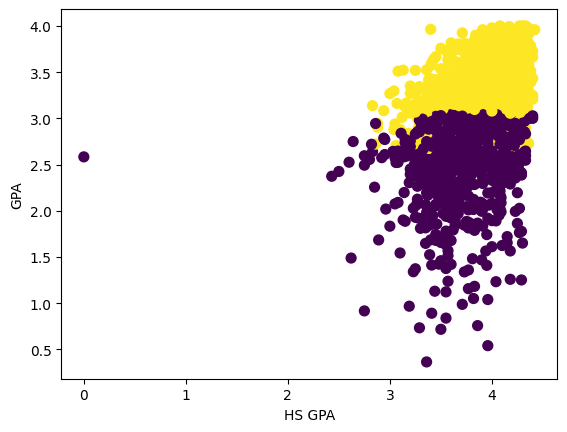

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)   #Tomar 10 vecinos
mknn.fit(XD,yd)                             #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

# Calculate XDP based on prediction (assuming XDP should hold features based on ydp)
XDP = XD[ydp == 1]  # Example: Selecting features where prediction is 1

#Las graficas se hacen con las variables que tienen mas correlacion
plt.scatter(XD[:,1],XD[:,3],c=yd,s=50,cmap='viridis')
plt.xlabel('HS GPA')
plt.ylabel('GPA')
plt.show()

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=10)   #Tomar 10 vecinos
mknn.fit(XD,yd)                             #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)

#Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusion:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Exac=(VP+VN)/(VP+VN+FP+FN)
Sen=VP/(VP+FN)
Spec=VN/(VN+FP)
print("Exactitud:",Exac)
print("Sensibilidad:",Sen)
print("Especificidad:",Spec)

Esta es la matriz de confusion:
 [[ 386  230]
 [  69 1315]]
Exactitud: 0.8505
Sensibilidad: 0.9501445086705202
Especificidad: 0.6266233766233766


El primer  individuo de la base de datos está en el cluster:  [3]

El segundo individuo de la base de datos está en el cluster:  [0]

El tercer individuo de la base de datos está en el cluster:  [1]


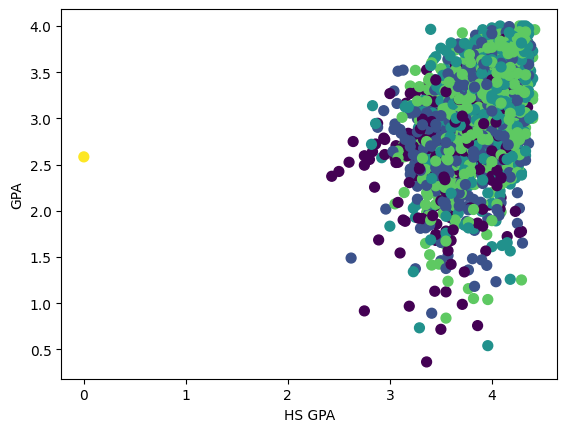

El modelo me presta: [1 0 0 ... 0 1 0]


Total de peronas a graduarse en el cluster 0: 131
Total de peronas del cluster 0: 269
Negados para el Cluster 0 es: 0.5130111524163569
Aprobados para el Cluster 0 es: 0.48698884758364314


Total de peronas a graduarse en el cluster 1: 371
Total de peronas del cluster 1: 554
Negados para el Cluster 1 es: 0.3303249097472924
Aprobados para el Cluster 1 es: 0.6696750902527075


Total de peronas a graduarse en el cluster 2: 370
Total de peronas del cluster 2: 488
Negados para el Cluster 2 es: 0.24180327868852458
Aprobados para el Cluster 2 es: 0.7581967213114754


Total de peronas a graduarse en el cluster 3: 510
Total de peronas del cluster 3: 686
Negados para el Cluster 3 es: 0.2565597667638484
Aprobados para el Cluster 3 es: 0.7434402332361516


Total de peronas a graduarse en el cluster 4: 2
Total de peronas del cluster 4: 3
Negados para el Cluster 4 es: 0.3333333333333333
Aprobados para el Cluster 4 es: 0.6666666666666666


Caracteristicas socio

In [ ]:
np.random.seed(42) #Para que a todos nos de el mismo modelo

#¿Dónde quedó el primer individuo?
XDP2=np.array([(1,4,1260,1.9,1)])
ydpp2=mkm.predict(XDP2)
print("El primer  individuo de la base de datos está en el cluster: ",ydpp2)
print()

#¿Dónde quedó el segundo individuo?
XDP2=np.array([(1,2.91,1090,2.719,1)])
ydpp2=mkm.predict(XDP2)
print("El segundo individuo de la base de datos está en el cluster: ",ydpp2)
print()

#¿Dónde quedó el tercer individuo?
XDP2=np.array([(0,3.58,1210,3.319, 1)])
ydpp2=mkm.predict(XDP2)
print("El tercer individuo de la base de datos está en el cluster: ",ydpp2)


plt.scatter(XD[:,1],XD[:,3],c=labels,s=50,cmap='viridis')

plt.xlabel('HS GPA');plt.ylabel('GPA')
plt.show()

#Modelo me vas a prestar o no
XDP=np.array([[26,800,15]])
ydpp2=mknn.predict(XD)
print("El modelo me presta:",ydpp2)
print()
print()
#Total de personas a graduarse en el cluster 0
c01 = len(np.where((labels==0) & (yd==1))[0])
print('Total de peronas a graduarse en el cluster 0:', c01)
#Cual es el porcentaje de preaprobados y negados del cluster 0
c00 = len(np.where((labels==0) & (yd==0))[0])
c01 = len(np.where((labels==0) & (yd==1))[0])
c00+c01

print('Total de peronas del cluster 0:', c00+c01)
print("Negados para el Cluster 0 es:", c00/(c00+c01))
print("Aprobados para el Cluster 0 es:", c01/(c00+c01))
print()
print()

#Total de personas a graduarse en el cluster 1
c11 = len(np.where((labels==1) & (yd==1))[0])
print('Total de peronas a graduarse en el cluster 1:', c11)
#Cual es el porcentaje de preaprobados y negados del cluster 1
c10 = len(np.where((labels==1) & (yd==0))[0])
c11 = len(np.where((labels==1) & (yd==1))[0])
c10+c11
print('Total de peronas del cluster 1:', c10+c11)
print("Negados para el Cluster 1 es:", c10/(c10+c11))
print("Aprobados para el Cluster 1 es:", c11/(c10+c11))
print()
print()

#Total de personas a graduarse en el cluster 2
c21 = len(np.where((labels==2) & (yd==1))[0])
print('Total de peronas a graduarse en el cluster 2:', c21)
#Cual es el porcentaje de aprobados y negados del cluster 2
c20 = len(np.where((labels==2) & (yd==0))[0])
c21 = len(np.where((labels==2) & (yd==1))[0]) # Calculate c21 before using it
c20+c21
print('Total de peronas del cluster 2:', c20+c21)
print("Negados para el Cluster 2 es:", c20/(c20+c21))
print("Aprobados para el Cluster 2 es:", c21/(c20+c21))
print()
print()

#Total de personas a graduarse en el cluster 3
c31 = len(np.where((labels==3) & (yd==1))[0])
print('Total de peronas a graduarse en el cluster 3:', c31)
#Cual es el porcentaje de aprobados y negados del cluster 3
c30 = len(np.where((labels==3) & (yd==0))[0])
c31 = len(np.where((labels==3) & (yd==1))[0])
c30+c31
print('Total de peronas del cluster 3:', c30+c31)
print("Negados para el Cluster 3 es:", c30/(c30+c31))
print("Aprobados para el Cluster 3 es:", c31/(c30+c31))
print()
print()

#Total de personas a graduarse en el cluster 4
c41 = len(np.where((labels==4) & (yd==1))[0])
print('Total de peronas a graduarse en el cluster 4:', c41)
#Cual es el porcentaje de aprobados y negados del cluster 4
c40 = len(np.where((labels==4) & (yd==0))[0])
c41 = len(np.where((labels==4) & (yd==1))[0])
c40+c41
print('Total de peronas del cluster 4:', c40+c41)
print("Negados para el Cluster 4 es:", c40/(c40+c41))
print("Aprobados para el Cluster 4 es:", c41/(c40+c41))
print()
print()


#Cual es la caracteristica sociodemografica de cada cluster
clusters=mkm.cluster_centers_

print("Caracteristicas sociodemograficas de cada cluster:\n",clusters)


*Análisis*

Las variables que tienen una mayor correlación son HS GPA Y GPA sin tener en cuenta la variable de salida Grad, con una correlación de 0.38.
Teniendo en cuenta la variable Grad, la mayor correlación es con GPA de 0.78.

De acuerdo con el modelo Naive Bayes, el grupo que logró una mayor clasificación en HS GPA y en GPA es el grupo 1 ya que son las personas que tienen valores más altos, 3.91 y 3.287.

El modelo funcionó de mejor manera clasificando los positivos. Logró una exactitud del 86%, superando el minimo requerido para ser un indicador confiable (75%). Se logró una especificidad del 73.4%


De los individuos de pronostico,
- El primer individuo no va a lograr el grado en 4 años, ya que arrojó como resultado 0.
- El segundo individuo también no va a lograr el grado en 4 años.
- El tercer individuo si logrará su grado en 4 años.


De acuerdo con el modelo decision tree, se logró un 90% de excatitud, un 99% de sensibilidad, clasificando con mayor exito los positivos y con un nivel de especificidad de 68.5%.
Vemos un mayor grado de confiabilidad en este modelo en comparación con Naive Bayes.

Identificamos 3 nodos puros. En donde se debe cumplir con las siguientes reglas:
- Nodo Puro 1: Camino 1: GPA <= 2.653 y luego True
gini = 0.0, samples = 413, value = [413, 0]
Regla de Negocio: Si el GPA es menor o igual a 2.653, entonces la clase es [413, 0]. 413 personas no se graduarán en 4 años.

- Nodo Puro 2: GPA <= 2.653 y luego False, GPA <= 3.041 y luego False, HS GPA <= 4.365 y luego False
 gini = 0.0, samples = 1075, value = [0, 1075]
Regla de Negocio: Si el GPA es menor o igual a 2.653, luego mayor a 3.041, y además el HS GPA es menor o igual a 4.365, entonces la clase es [0, 1075]. 1075 personas si se graduarán en 4 años.

- Nodo Puro 3:: GPA > 2.653 y luego False, GPA <= 3.041 y luego False, HS GPA > 4.365.
 gini = 0.0, samples = 3, value = [3, 0]
Regla de Negocio: Si el GPA es menor o igual a 2.653, luego mayor a 3.041, además el HS GPA es menor o igual a 4.365, y finalmente el GPA es mayor a 3.037, entonces la clase es [3, 0]. 3 Personas no se graduarán en 4 años.

1. ['White', 'HS GPA', 'SAT', 'GPA', 'GPA', 'College Parent'], [1,1,4,1260,1.9,1] -- 0 = NO se graduará en 4 años.

2. ['White', 'HS GPA', 'SAT', 'GPA', 'GPA', 'College Parent'], [1,1,2.91,1090,2.719,1] -- 0 = No se graduará en 4 años.

3. ['White', 'HS GPA', 'SAT', 'GPA', 'GPA', 'College Parent'], [0,3.58,1210,3.319,1] -- 1 = SI se graduará en 4 años.

Segun el modelo K Means

Los cluster que lograron una mayor calificación en la preparatoria HS GPA y promedio de la calificación de la universidad, es el cluster numero 2.
El coeficiente de exactitud del modelo es de 85%, ka sensibilidad de 95% y la especificidad de 62%.
Este modelo tiene

El cluster que posee la mayor cantidad de personas que van a graduarse es el 2 entre 70 y 75%.
El cluster que pertenecen los estudiantes de la hoja de pronosticos es el es 001.
